In [55]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np
import time

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **CNN Model Evaluations: Charts and Results**

<span style="color:blue">

#### **Left Chart (Training and Validation Accuracy):**

</span>

- The x-axis represents the epochs, showing the progress of training over time from epoch 1 to 10.
- The y-axis represents accuracy, which in this case measures the proportion of correct predictions made by the model.
- The blue line (marked with blue dots) tracks the training accuracy at each epoch.
- The solid blue line tracks the validation accuracy at each epoch. This measures how well the model performs on a separate set of data not seen during training, providing an indication of how well the model generalizes.

<span style="color:red">

#### **Right Chart (Training and Validation Loss):**

</span>
- The x-axis again represents the epochs.
- The y-axis represents loss, which is a measure of the prediction error made by the model. Lower values are better as they indicate a smaller error.
- The red dots represent the training loss at each epoch, showing how the model's error decreases as it learns.
- The solid red line represents the validation loss, which tracks how the prediction error evolves on the validation dataset.

## **CNN Model: Light from Scratch**

In [49]:
# Load the training history from the JSON file
try:
    with open('cnn_model_light.json', 'r') as file:
        history_light = json.load(file)
except FileNotFoundError:
    print(f"Error: The file {'cnn_model_light.json'} does not exist.")
    history_light = {}  # Assign an empty dictionary to prevent further errors if file is not found

In [50]:
# Access the history dictionary
acc = history_light['accuracy']
val_acc = history_light['val_accuracy']
loss = history_light['loss']
val_loss = history_light['val_loss']

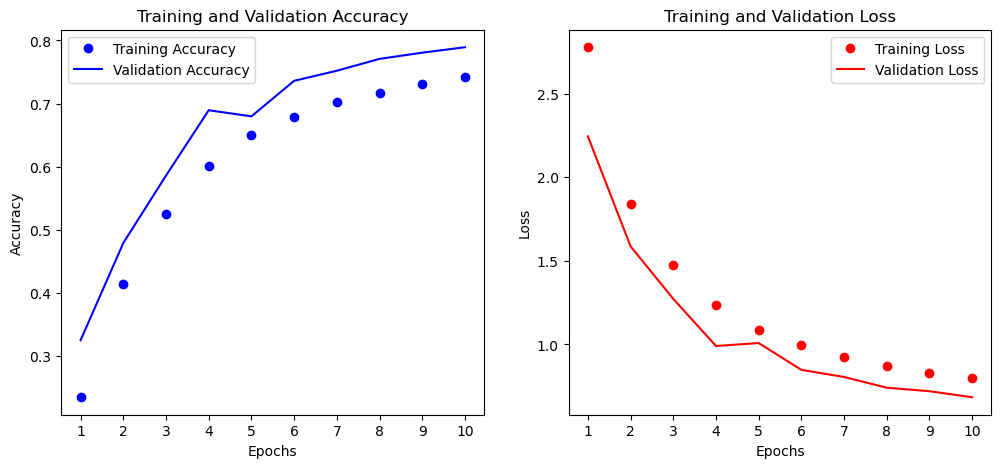

In [51]:
# Calculate the number of epochs based on the length of any metric list
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

plt.show()

In [52]:
# Print the epoch-wise training and validation metrics
print("Epoch-wise Training and Validation Accuracy:")
for epoch in range(len(history_light['accuracy'])):
    print(f"Epoch {epoch+1}:")
    print(f"    Training Accuracy: {history_light['accuracy'][epoch]}")
    print(f"    Validation Accuracy: {history_light['val_accuracy'][epoch]}")
    print(f"    Training Loss: {history_light['loss'][epoch]}")
    print(f"    Validation Loss: {history_light['val_loss'][epoch]}")

Epoch-wise Training and Validation Accuracy:
Epoch 1:
    Training Accuracy: 0.23484022915363312
    Validation Accuracy: 0.3252461850643158
    Training Loss: 2.7767763137817383
    Validation Loss: 2.2440414428710938
Epoch 2:
    Training Accuracy: 0.4149872958660126
    Validation Accuracy: 0.47919315099716187
    Training Loss: 1.8417434692382812
    Validation Loss: 1.5862687826156616
Epoch 3:
    Training Accuracy: 0.5254289507865906
    Validation Accuracy: 0.5860069990158081
    Training Loss: 1.4731796979904175
    Validation Loss: 1.2721320390701294
Epoch 4:
    Training Accuracy: 0.6004447937011719
    Validation Accuracy: 0.6894853711128235
    Training Loss: 1.2345728874206543
    Validation Loss: 0.9905050992965698
Epoch 5:
    Training Accuracy: 0.649543821811676
    Validation Accuracy: 0.6797966957092285
    Training Loss: 1.0857093334197998
    Validation Loss: 1.0082212686538696
Epoch 6:
    Training Accuracy: 0.6779910922050476
    Validation Accuracy: 0.73606258630

### **CNN Model: Light from Scratch Conclusion**

### **Overview**

- **Training Accuracy** increases from **23.48% to 74.17%**.
- **Validation Accuracy** also increases, closely mirroring the training accuracy, from **32.52% to 78.93%**.
- **Training and Validation Loss** both decrease consistently across epochs, which suggests effective learning and generalization.

### **Evaluation Points**

- **Overfitting**:
  - There are no clear signs of overfitting, as both the training and validation metrics improve in tandem. No divergence where training significantly outperforms validation suggests that the model generalizes well to unseen data.

- **Underfitting**:
  - The model does not show signs of underfitting, as evidenced by substantial and steady improvements in accuracy and loss, indicating that the model's capacity is adequate for the complexity of the data.

- **Good Fit**:
  - The parallel improvement in training and validation accuracy and loss, alongside consistent gains across metrics without plateauing, indicates that the model is well-fitted to the data.

### **Conclusion**

The training session results demonstrate a **good fit** for the model on the provided dataset. It effectively learns and generalizes patterns without overfitting or underfitting. 

In [71]:
# Load the model
scratch_model_light = load_model('scratch_model_light.h5')

In [54]:
# Testing own images
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

gesture_images = ['myImages/three2.png',
                  'myImages/rock.png',
                  'myImages/ok.jpg',
                  'myImages/two_up_inverted.png']

for img_path in gesture_images:
    predicted_gesture = predict_gesture(scratch_model_light, img_path, class_names)
    print(f"Prediction for {img_path}: {predicted_gesture}")

1/1 [==============================] - 0s 86ms/step
Prediction for myImages/three2.png: three2
1/1 [==============================] - 0s 20ms/step
Prediction for myImages/rock.png: rock
1/1 [==============================] - 0s 17ms/step
Prediction for myImages/ok.jpg: call
1/1 [==============================] - 0s 18ms/step
Prediction for myImages/two_up_inverted.png: two_up_inverted


In [70]:
path_to_load = 'savedDataset'
train_ds = tf.data.experimental.load(path_to_load + '/train')
val_ds = tf.data.experimental.load(path_to_load + '/val')
test_ds = tf.data.experimental.load(path_to_load + '/test')

In [73]:
# Function to measure inference time
def measure_inference_time(model, dataset):
    start_time = time.time()
    model.evaluate(dataset)
    elapsed_time = time.time() - start_time
    return elapsed_time

# Load the preprocessed and saved test dataset
test_ds = tf.data.experimental.load('savedDataset/test')

# Measure the inference time
inference_time_scratch_model_light = measure_inference_time(scratch_model_light, test_ds)
print(f"Inference Time: {inference_time_scratch_model_light:.3f} seconds")

394/394 [==============================] - 2s 4ms/step - loss: 0.6985 - accuracy: 0.7830
Inference Time: 2.199 seconds


## **CNN Model: Deep from Scratch**

In [17]:
# Load the training history from the JSON file
try:
    with open('cnn_model_deep.json', 'r') as file:
        history_deep = json.load(file)
except FileNotFoundError:
    print(f"Error: The file {'cnn_model_deep.json'} does not exist.")
    history_deep = {}  # Assign an empty dictionary to prevent further errors if file is not found

In [18]:
# Access the history dictionary
acc = history_deep['accuracy']
val_acc = history_deep['val_accuracy']
loss = history_deep['loss']
val_loss = history_deep['val_loss']

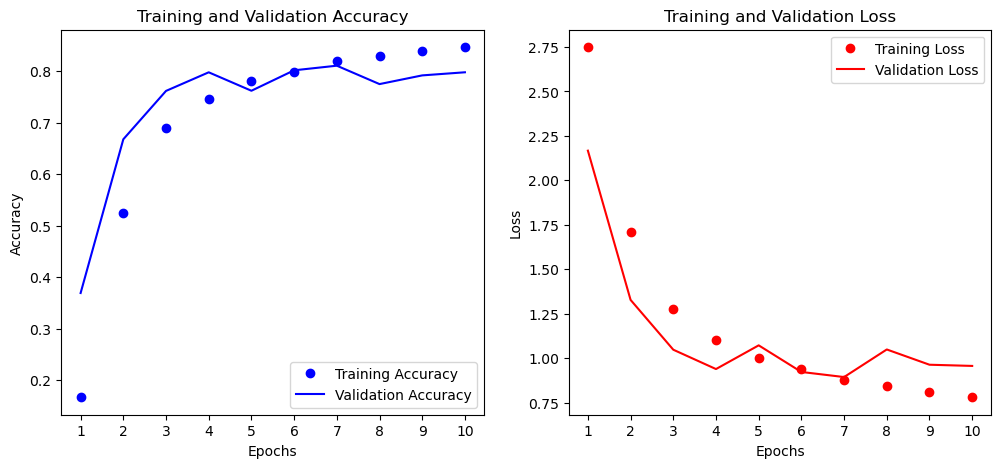

In [19]:
# Calculate the number of epochs based on the length of any metric list
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

plt.show()

In [20]:
# Print the epoch-wise training and validation metrics
print("Epoch-wise Training and Validation Accuracy:")
for epoch in range(len(history_deep['accuracy'])):
    print(f"Epoch {epoch+1}:")
    print(f"    Training Accuracy: {history_deep['accuracy'][epoch]}")
    print(f"    Validation Accuracy: {history_deep['val_accuracy'][epoch]}")
    print(f"    Training Loss: {history_deep['loss'][epoch]}")
    print(f"    Validation Loss: {history_deep['val_loss'][epoch]}")

Epoch-wise Training and Validation Accuracy:
Epoch 1:
    Training Accuracy: 0.1664397269487381
    Validation Accuracy: 0.36904382705688477
    Training Loss: 2.748460054397583
    Validation Loss: 2.1669039726257324
Epoch 2:
    Training Accuracy: 0.524634599685669
    Validation Accuracy: 0.6679638028144836
    Training Loss: 1.7113209962844849
    Validation Loss: 1.3278752565383911
Epoch 3:
    Training Accuracy: 0.6900190711021423
    Validation Accuracy: 0.7619917392730713
    Training Loss: 1.2756727933883667
    Validation Loss: 1.0478925704956055
Epoch 4:
    Training Accuracy: 0.7466526031494141
    Validation Accuracy: 0.798165500164032
    Training Loss: 1.1041144132614136
    Validation Loss: 0.939116358757019
Epoch 5:
    Training Accuracy: 0.7807166576385498
    Validation Accuracy: 0.7623094320297241
    Training Loss: 1.0004847049713135
    Validation Loss: 1.072414517402649
Epoch 6:
    Training Accuracy: 0.7986338138580322
    Validation Accuracy: 0.8020568490028381

### **CNN Model: Deep from Scratch Conclusion**

### **Overview**

- **Training Accuracy:** consistently increases from **16.64% to 84.69%**.
- **Validation Accuracy:** also improves, though with some fluctuations, peaking at **80.21% in Epoch 6** and closing at **79.82% in Epoch 10**.
- **Training Loss:** decreases from **2.75 to 0.78**, showing progressive learning.
- **Validation Loss:** decreases overall but exhibits fluctuations, indicating some variability in how the model generalizes to unseen data.

### Key Points

- **Overfitting Signs:**
  - There are potential signs of overfitting as observed from fluctuations in the validation accuracy and loss, especially when validation loss increases in later epochs (Epoch 8) while training loss continues to decrease. This divergence might suggest that the model is beginning to memorize training data.

- **Underfitting Signs:**
  - Initial epochs show substantial gaps between training and validation metrics, suggesting initial underfitting. However, as training progresses, the model begins to fit the training data more accurately, and this gap narrows, indicating reduced underfitting.

- **Good Fit Indicators:**
  - The consistent improvement in training accuracy and the corresponding decrease in training loss throughout the epochs indicate that the model is effectively learning the training data. The validation metrics, despite their fluctuations, follow a generally improving trend, suggesting that with some adjustments, the model could potentially generalize even better.

The analysis indicates that while the model is effectively learning from the training data and showing signs of a good fit, there are observable signs of potential overfitting as evidenced by the increase in validation loss in later epochs. The model incorporates specific strategies to mitigate this and enhance its generalization capabilities:

### **Current Strategies**

- **L2 Regularization:** The model employs L2 regularization in key convolutional layers. This technique helps prevent the model's weights from growing excessively large, reducing the risk of overfitting by discouraging the learning of overly complex patterns that do not generalize well beyond the training data.

- **Dropout:** To further combat overfitting, dropout layers are integrated into the network architecture, particularly following high-capacity layers. This method randomly deactivates a subset of neurons during training, encouraging the network to develop redundant pathways and thus improve its generalization by not relying too heavily on any single neuron.

### **Planned Enhancements**

- **Data Augmentation:** Although not utilized in the current model, data augmentation will be implemented in future models to address both overfitting and underfitting. By artificially expanding the training dataset using transformations such as rotations and flipping the images horizontally the data augmentation can simulate a wider array of real-world scenarios. This approach will enable the model to learn more robust features and improve its ability to generalize, making it more adaptable to new, unseen data and hopefully more become accurate.

### **Conclusion**

The integration of L2 regularization and dropout demonstrates a deliberate effort to design a model that balances well between fitting the training data and generalizing to new data. The planned introduction of data augmentation strategies in future models is expected to further enhance this balance, addressing both overfitting and underfitting by diversifying the training examples. This proactive strategy is anticipated to refine the model's performance, making it more robust and reliable for deployment in varied real-world environments.

In [34]:
# Load the model
scratch_model_deep = load_model('scratch_model_deep.h5')

In [35]:
# Testing own images
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

gesture_images = ['myImages/three2.png',
                  'myImages/rock.png',
                  'myImages/ok.jpg',
                  'myImages/two_up_inverted.png']

for img_path in gesture_images:
    predicted_gesture = predict_gesture(scratch_model_deep, img_path, class_names)
    print(f"Prediction for {img_path}: {predicted_gesture}")

1/1 [==============================] - 0s 360ms/step
Prediction for myImages/three2.png: three2
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/rock.png: rock
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/ok.jpg: ok
1/1 [==============================] - 0s 19ms/step
Prediction for myImages/two_up_inverted.png: two_up_inverted


## **CNN Model: Data Augmentation**

In [36]:
# Load the training history from the JSON file
try:
    with open('cnn_model_da.json', 'r') as file:
        history_deep = json.load(file)
except FileNotFoundError:
    print(f"Error: The file {'cnn_model_da.json'} does not exist.")
    history_deep = {}  # Assign an empty dictionary to prevent further errors if file is not found

In [37]:
# Access the history dictionary
acc = history_deep['accuracy']
val_acc = history_deep['val_accuracy']
loss = history_deep['loss']
val_loss = history_deep['val_loss']

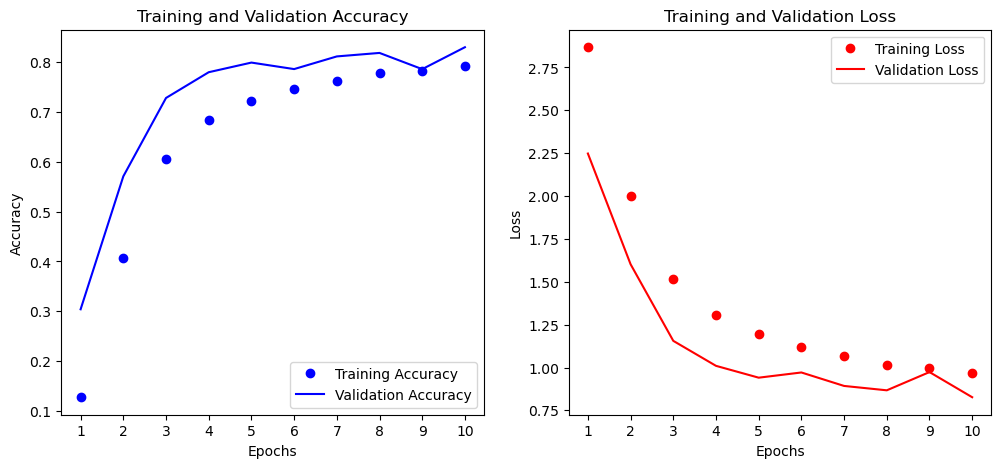

In [38]:
# Calculate the number of epochs based on the length of any metric list
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

plt.show()

In [39]:
# Print the epoch-wise training and validation metrics
print("Epoch-wise Training and Validation Accuracy:")
for epoch in range(len(history_deep['accuracy'])):
    print(f"Epoch {epoch+1}:")
    print(f"    Training Accuracy: {history_deep['accuracy'][epoch]}")
    print(f"    Validation Accuracy: {history_deep['val_accuracy'][epoch]}")
    print(f"    Training Loss: {history_deep['loss'][epoch]}")
    print(f"    Validation Loss: {history_deep['val_loss'][epoch]}")

Epoch-wise Training and Validation Accuracy:
Epoch 1:
    Training Accuracy: 0.12798430025577545
    Validation Accuracy: 0.3041613698005676
    Training Loss: 2.8681955337524414
    Validation Loss: 2.2481112480163574
Epoch 2:
    Training Accuracy: 0.4069989025592804
    Validation Accuracy: 0.5704812407493591
    Training Loss: 2.0021204948425293
    Validation Loss: 1.6023536920547485
Epoch 3:
    Training Accuracy: 0.6054942607879639
    Validation Accuracy: 0.7275254130363464
    Training Loss: 1.5182194709777832
    Validation Loss: 1.155517816543579
Epoch 4:
    Training Accuracy: 0.6842660903930664
    Validation Accuracy: 0.7791057825088501
    Training Loss: 1.3077961206436157
    Validation Loss: 1.0098215341567993
Epoch 5:
    Training Accuracy: 0.7218590974807739
    Validation Accuracy: 0.7984037399291992
    Training Loss: 1.1944689750671387
    Validation Loss: 0.9407505989074707
Epoch 6:
    Training Accuracy: 0.7461532950401306
    Validation Accuracy: 0.785379588603

### **CNN Model: Data Augmentation Evaluation**

### **Overview**

- **Training Accuracy** increases steadily from **12.80% to 79.24%** across the epochs.
- **Validation Accuracy** also increases, showing considerable improvement from **30.42% to 82.92%**, which closely follows the trends seen in the training accuracy.
- **Training and Validation Loss** both decrease, with training loss dropping from **2.87 to 0.97**, and validation loss reducing from **2.25 to 0.83**. However, there are periods where validation loss increases slightly, suggesting minor fluctuations in model generalization.

### **Evaluation Points**

- **Overfitting Indicators:**
  - The model shows occasional increases in validation loss (notably in Epoch 6 and Epoch 9), which could suggest mild overfitting at certain points. However, these are relatively minor as the general trend in validation loss remains downward.

- **Underfitting Indicators:**
  - The significant improvements and closing gap between training and validation metrics indicate that the model is not underfitting; it is adequately learning the underlying patterns in the data.

- **Good Fit Indicators:**
  - The general upward trend in validation accuracy and a downward trend in validation loss across most epochs indicate that the model is generally well-fitted. The final epoch shows strong performance with high accuracy and low loss, suggesting effective learning and generalization by the end of the training process.

### **Conclusion**

The model incorporates effective strategies such as **L2 regularization** and **dropout** to manage overfitting, complemented by **data augmentation** which enhances its ability to generalize by simulating more diverse training scenarios. The observed fluctuations in validation loss suggest that while the model is mostly well-fitted, there could be room for further tuning. Future strategies will focus on:

- **Refining Data Augmentation:** Enhancing the variety and extent of data augmentation to provide more robust training scenarios, helping the model generalize even better to unseen data. For the purposes of this project I will not be doing this as the time to train the model would be too extensive but it is an option for future models.
- **Adjusting Dropout Rates:** Adapting or Fine-tuning the dropout layers' could help stabilize the model even further, especially where minor spikes are observed. This will be done in the next model.
- **Experimenting with Regularization:** Adjusting the strength of L2 regularization may help address any remaining overfitting, ensuring smoother validation loss trends.


In [40]:
# Load the model
scratch_model_da = load_model('scratch_model_da.h5')

In [41]:
# Testing own images
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

gesture_images = ['myImages/three2.png',
                  'myImages/rock.png',
                  'myImages/ok.jpg',
                  'myImages/two_up_inverted.png']

for img_path in gesture_images:
    predicted_gesture = predict_gesture(scratch_model_da, img_path, class_names)
    print(f"Prediction for {img_path}: {predicted_gesture}")

1/1 [==============================] - 0s 136ms/step
Prediction for myImages/three2.png: three2
1/1 [==============================] - 0s 18ms/step
Prediction for myImages/rock.png: rock
1/1 [==============================] - 0s 17ms/step
Prediction for myImages/ok.jpg: ok
1/1 [==============================] - 0s 21ms/step
Prediction for myImages/two_up_inverted.png: two_up_inverted


## **CNN Model: Data Augmentation Fine-Tuned**

In [42]:
# Load the training history from the JSON file
try:
    with open('cnn_model_da_adapted.json', 'r') as file:
        history_da_adapted = json.load(file)
except FileNotFoundError:
    print(f"Error: The file {'cnn_model_da_adapted.json'} does not exist.")
    history_da_adapted = {}  # Assign an empty dictionary to prevent further errors if file is not found

In [43]:
# Access the history dictionary
acc = history_da_adapted['accuracy']
val_acc = history_da_adapted['val_accuracy']
loss = history_da_adapted['loss']
val_loss = history_da_adapted['val_loss']

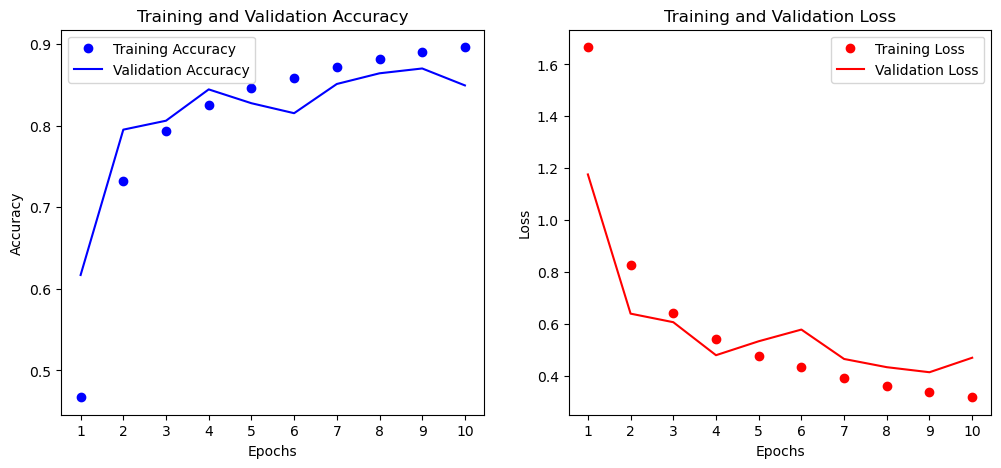

In [44]:
# Calculate the number of epochs based on the length of any metric list
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(acc) + 1))  # Set x-ticks to show each epoch
plt.legend()

plt.show()

In [45]:
# Print the epoch-wise training and validation metrics
print("Epoch-wise Training and Validation Accuracy:")
for epoch in range(len(history_da_adapted['accuracy'])):
    print(f"Epoch {epoch+1}:")
    print(f"    Training Accuracy: {history_da_adapted['accuracy'][epoch]}")
    print(f"    Validation Accuracy: {history_da_adapted['val_accuracy'][epoch]}")
    print(f"    Training Loss: {history_da_adapted['loss'][epoch]}")
    print(f"    Validation Loss: {history_da_adapted['val_loss'][epoch]}")

Epoch-wise Training and Validation Accuracy:
Epoch 1:
    Training Accuracy: 0.4671046733856201
    Validation Accuracy: 0.6169790625572205
    Training Loss: 1.6663602590560913
    Validation Loss: 1.1762266159057617
Epoch 2:
    Training Accuracy: 0.7324686646461487
    Validation Accuracy: 0.7952271103858948
    Training Loss: 0.8278337121009827
    Validation Loss: 0.6398981809616089
Epoch 3:
    Training Accuracy: 0.7932779788970947
    Validation Accuracy: 0.8061864972114563
    Training Loss: 0.642504096031189
    Validation Loss: 0.6069416999816895
Epoch 4:
    Training Accuracy: 0.8256399631500244
    Validation Accuracy: 0.8445838689804077
    Training Loss: 0.5419251918792725
    Validation Loss: 0.47975075244903564
Epoch 5:
    Training Accuracy: 0.8459286689758301
    Validation Accuracy: 0.8276286721229553
    Training Loss: 0.476192444562912
    Validation Loss: 0.5334921479225159
Epoch 6:
    Training Accuracy: 0.858660101890564
    Validation Accuracy: 0.81539869308471

### **CNN Model: Data Augmentation Fine-Tuned Evaluation**

### **Overview**
- **Training Accuracy:** Increased significantly from **46.71% to 89.63%** over 10 epochs.
- **Validation Accuracy:** Improved substantially from **61.70% to 84.95%**, albeit with some fluctuations that suggest variances in model generalization across epochs.
- **Training Loss:** Decreased steadily from **1.67 to 0.32**, showing consistent learning improvements.
- **Validation Loss:** Decreased but showed fluctuations, notably increasing in the later epochs (Epochs 5, 6, and 10), indicating potential issues with model generalization.

### **Detailed Points**

- **Overfitting Indicators:**
  - Although training accuracy continues to improve, the fluctuations in validation accuracy and increases in validation loss during later epochs suggest potential overfitting. The model may be too closely fitting the nuances of the training data, impacting its ability to generalize to unseen data effectively.

- **Underfitting Indicators:**
  - There are no significant signs of underfitting as both the training and validation accuracies are high, and the model shows substantial learning progress throughout the epochs.

- **Good Fit Indicators:**
  - The high training and validation accuracies, along with the general trend of decreasing loss, indicate a good fit for much of the training process. The model successfully captures the underlying patterns in the data and can generalize well to validation data for the most part.

### **Conclusion**

The model's architecture, including the use of data augmentation, has demonstrated a strong ability to learn and generalize from training data. However, the observed fluctuations and periodic increases in validation loss suggest that there might be room for further optimization to enhance stability and consistency in generalization. Future strategies could include:

- **Enhanced Regularization**: Adjusting the dropout rates or adding additional regularization techniques might help manage the overfitting more effectively.
- **Learning Rate Adjustments**: Implementing learning rate schedules such as ``ReduceLROnPlateau`` might help mitigate the observed fluctuations in validation loss.
- **Data Augmentation**: Further diversifying the data augmentation strategies to include more varied transformations might help improve the robustness and generalization capabilities of the model. As previously discussed, this project will not implement extensive data augmentation due to the significant increase in training times. For the purposes of this project, horizontal flipping and rotation will suffice to meet our data augmentation needs.

These adjustments will be added to the following CNN Model.


In [46]:
# Load the model
scratch_model_da_adapted = load_model('scratch_model_da_adapted.h5')

In [47]:
# Testing own images
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

gesture_images = ['myImages/three2.png',
                  'myImages/rock.png',
                  'myImages/ok.jpg',
                  'myImages/two_up_inverted.png']

for img_path in gesture_images:
    predicted_gesture = predict_gesture(scratch_model_da_adapted, img_path, class_names)
    print(f"Prediction for {img_path}: {predicted_gesture}")

1/1 [==============================] - 0s 126ms/step
Prediction for myImages/three2.png: three2
1/1 [==============================] - 0s 22ms/step
Prediction for myImages/rock.png: rock
1/1 [==============================] - 0s 22ms/step
Prediction for myImages/ok.jpg: ok
1/1 [==============================] - 0s 20ms/step
Prediction for myImages/two_up_inverted.png: two_up_inverted


## **CNN Model: Grayscale**